# Project #1

# Exploring Weather Trends

Analyzing local and global temperature data and comparation the temperature trends in the city of Munich to overall global temperature trends.

## 1. Extracting the data from the data base using SQL

### 1.1 Extracting the city data

>**SELECT * FROM city_data**

### 1.2 Extracting the city list

>**SELECT * FROM city_list**

### 1.3 Extracting the global data

>**SELECT * FROM global_data**

**As result of 1.1, 1.2 and 1.3 three CVS were obtained: city_data.csv, city_list.csv, global_data.csv**

# 2. Exploring the data

## 2.1 First look at  data

In [23]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the csv data
city_data = pd.read_csv('city_data.csv', index_col = 'year')
city_list = pd.read_csv('city_list.csv')
global_data = pd.read_csv('global_data.csv', index_col = 'year')

In [3]:
city_data.head()

,city,country,avg_temp
year,,,
1849,Abidjan,Côte D'Ivoire,25.58
1850,Abidjan,Côte D'Ivoire,25.52
1851,Abidjan,Côte D'Ivoire,25.67
1852,Abidjan,Côte D'Ivoire,NaN
1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [5]:
global_data.head()

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


## 2.2 Searching for the closest city 

Let's take a look to the cities in Germany and choose the closest city to Ingolstadt

In [6]:
city_data['city'][city_data['country']=='Germany'].unique()

array(['Berlin', 'Hamburg', 'Munich'], dtype=object)

The city of **Munich** is chosen as the reference

## 2.3 Exploring the data of Munich

In [7]:
munich_data = city_data[city_data['city']=='Munich']
munich_data.head()

,city,country,avg_temp
year,,,
1743,Munich,Germany,1.32
1744,Munich,Germany,6.09
1745,Munich,Germany,-2.15
1746,Munich,Germany,NaN
1747,Munich,Germany,NaN


Let's explore and deal with missing values

In [30]:
munich_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 1743 to 2013
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         271 non-null    object 
 1   country      271 non-null    object 
 2   avg_temp     267 non-null    float64
 3   avg_temp_mv  258 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.6+ KB


In [26]:
munich_data[munich_data['avg_temp'].isnull()]

,city,country,avg_temp,avg_temp_mv
year,,,,
1746,Munich,Germany,NaN,NaN
1747,Munich,Germany,NaN,NaN
1748,Munich,Germany,NaN,NaN
1749,Munich,Germany,NaN,NaN


In [8]:
munich_data.fillna(method='ffill')

,city,country,avg_temp
year,,,
1743,Munich,Germany,1.32
1744,Munich,Germany,6.09
1745,Munich,Germany,-2.15
1746,Munich,Germany,-2.15
1747,Munich,Germany,-2.15
...,...,...,...
2009,Munich,Germany,5.89
2010,Munich,Germany,4.85
2011,Munich,Germany,6.56


## 2.4 Buildig the moving average

In [16]:
munich_data['avg_temp_mv'] = munich_data['avg_temp'].rolling(7).mean()
global_data['avg_temp_mv'] = global_data['avg_temp'].rolling(7).mean()
temp_dif = global_data['avg_temp_mv'] - munich_data['avg_temp_mv']

C:\Users\F4HOBUP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2.5 Plotting the data

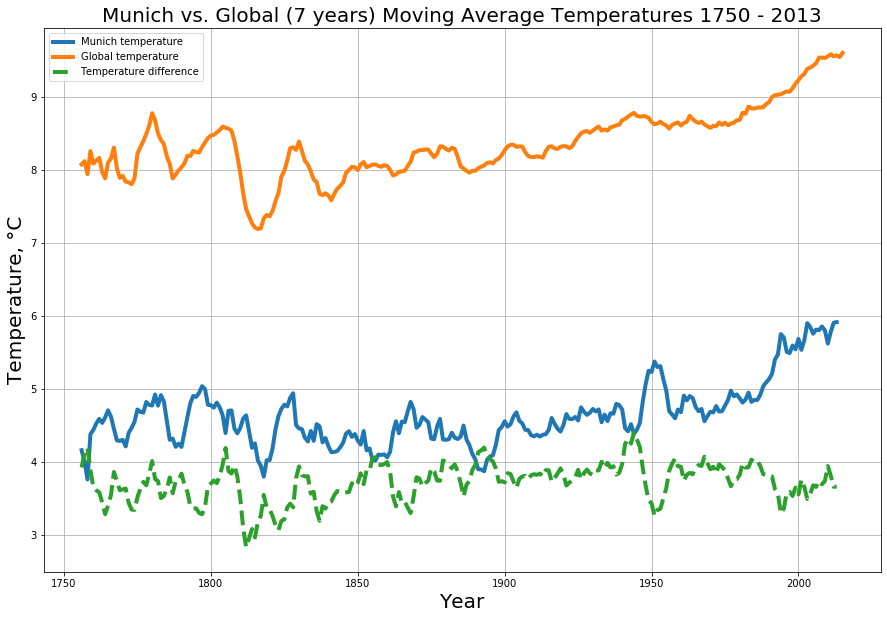

In [24]:
plt.figure(figsize=(15,10))
munich_data['avg_temp_mv'].plot(lw=4, label = 'Munich temperature')
global_data['avg_temp_mv'].plot(lw=4, label = 'Global temperature')
temp_dif.plot(lw=4, ls='--', label ='Temperature difference')
plt.title('Munich vs. Global (7 years) Moving Average Temperatures 1750 - 2013', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Temperature, °C', fontsize = 20)
plt.legend(loc='best')
plt.grid()
plt.show()

## 2.6 Conclusions

1. Is your city hotter or cooler on average compared to the global average? --> The temperature in the city of Munich was over the years cooler as the average global temperature 
2. Has the difference been consistent over time? --> the difference of the temperatures was pretty consistent over time and was between 3 and 4 degrees
3. How do the changes in your city’s temperatures over time compare to the changes in the global average? --> on the picture you can see that the temperatures correlate very well with each other. Increases and decreases in global temperature can also be felt in Munich
4. What does the overall trend look like? --> until 1900 in the period before industrialization, the average temperature was around 8 degrees. After industrialization, the temperature rose all over the world and in Munich as well
5. Is the world getting hotter or cooler? --> after 1900 ist getting definitely hotter
6. Has the trend been consistent over the last few hundred years? --> the trend is consisten raising over the past few hundred years